# Latar Belakang

Sebagai creative director dari suatu perusahaan talent management di Amerika Serikat, saya bertanggung jawab dalam mengembangkan nama dan brand perusahaan dan talenta digital yang berada dibawah naungan perusahaan. Setelah melakukan diskusi dengan tim, kita menyimpulkan bahwa salah satu cara yang efektif adalah dengan membuat youtube video yang trending. Kita memilih youtube karena youtube adalah video platform paling populer dan paling banyak dikunjungi per tahunnya. 

## Pernyataan Masalah

Sebagai seorang *data analyst*, kita akan mencoba menjawab pertanyaan berikut:
**Bagaimana karakteristik video yang trending?**

Dengan mengetahui **karakteristik apa saja yang dapat membuat suatu video menjadi trending**, kita dapat:
1) Memperlebar exposure perusahaan dan talenta digital perusahaan kepada masyarakat luas
2) Menarik sponsor atau brand yang ingin melakukan kerja sama dengan perusuahaan atau talent perusahaan

# Data
Kita akan menganalisa data yang berisi video youtube yang trending di US untuk tahun 2017 dan 2018. 
Dataset dapat diakses [di sini](https://www.kaggle.com/datasets/datasnaek/youtube-new). 

In [246]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

from collections import Counter
import datetime

import nltk
from nltk.corpus import stopwords

import warnings
warnings.filterwarnings("ignore")

In [247]:
# READ FILE
df = pd.read_csv('USvideos.csv')

Dataset ini berisi informasi terkait setiap video yang trending seperti judul video, nama channel, tanggal trending, jumlah views, jumlah comment dan lain-lain. Secara total, ada 16 kolom di dalam dataset trending youtube, yaitu:  

* video_id : ID unik untuk setiap video
* trending_date : tanggal video tersebut trending
* title : judul video
* channel_title : nama channel yang mempublish/mengupload video
* category_id : kode unik kategori (setiap kategori memiliki kode unik)
* publish_time : kapan video tersebut di upload ke youtube
* tags : kata-kata deskriptif yang bisa membantu viewers mencari konten tertentu di youtube berdasarkan kata tersebut
* views : jumlah penonton video tersebut
* likes : jumlah penonton yang menyukai video tersebut (dengan menekan tombol like di youtube)
* dislikes : jumlah penonton yang tidak menyukai video tersebut (dengan menekan tombol dislike di youtube)
* comment_count : jumlah comment yang ditulis penonton untuk video tersebut
* thumbnail_link : link yang digunakan sebagai cover photo dari youtube video tersebut
* comments_disabled : apakah video kreator tersebut membolehkan penonton untuk menulis comment (Yes or No)
* ratings_disabled : apakah video tersebut memiliki rating yang meng-kategorikan video berdasarkan explicit language/violence/nudity/drug references dan sexual references (Yes or No)
* video_error_or_removed : apakah video tersebut pernah error (misalnya: gagal upload) atau removed (dihapus dari youtube) (YES or NO)
* description : teks yang ditulis konten kreator untuk mendeskripsikan video mereka

Berikut 5 baris teratas dan terbawah dari dataset youtube trending videos.

In [248]:
display(df.head(),df.tail())

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...
40948,ooyjaVdt-jA,18.14.06,Official Call of Duty®: Black Ops 4 — Multipla...,Call of Duty,20,2018-05-17T17:09:38.000Z,"call of duty|""cod""|""activision""|""Black Ops 4""",10306119,357079,212976,144795,https://i.ytimg.com/vi/ooyjaVdt-jA/default.jpg,False,False,False,Call of Duty: Black Ops 4 Multiplayer raises t...


## 1. Data Understanding and Cleaning
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan lebih mengenal data apa saja yang bisa kita olah beserta anomali-anomali yang terdapat di dalam dataset kita (jika ada) yang perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

Pertama, mari kita lihat informasi dari dataset *youtube trending*.

In [249]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (40949, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14

In [250]:
display(df.describe(), df.describe(include='object'))

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


,video_id,trending_date,title,channel_title,publish_time,tags,thumbnail_link,description
count,40949,40949,40949,40949,40949,40949,40949,40379
unique,6351,205,6455,2207,6269,6055,6352,6901
top,j4KvrAUjn6c,17.14.11,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,ESPN,2018-05-18T14:00:04.000Z,[none],https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,► Listen LIVE: http://power1051fm.com/\n► Face...
freq,30,200,30,203,50,1535,30,58


Secara umum, kita bisa melihat bahwa:
* dataset 'youtube trending' memiliki 16 kolom dan 40949 baris 
* Hanya 1 kolom, yaitu, kolom `description` yang memiliki data kosong. Data kosong pada kolom ini diwakili dengan data NaN. Jika dilihat dari jumlah data NaN, yaitu sebanyak 570 dari total 40949 baris (sekitar ~1.4% dari total data), maka kita bisa katakan jumlah data NaN tidak terlalu signifikan, sehingga saat menganalisa kolom 'description' ini kita bisa hapus saja baris dengan data NaN.
* kolom `video_id` berisikan id unik untuk setiap video, sehingga tidak relevan dalam analisis dan bisa dihapus saja.
* kolom `thumbnail_link` berisikan link yang berisi foto thumbnail dari video tersebut. Akan tetapi, link tersebut tidak secara langsung mendeskripsikan isi atau detail mengenai foto thumbnail itu, sehingga tidak relevan dalam analisis dan bisa dihapus saja. 
* kolom `category_id` berisikan id unik yang menunjukkan category dari video tersebut. Untuk mengetahui nama category tersebut, kita perlu meng-extract nama category dari file "US_category_id.json" (yang akan kita lakukan nanti)
* kolom `trending_date` berisikan tanggal trending date. Format data 'trending date' ini masih bisa dibersihkan lagi menjadi bentuk datetime. Dari kolom 'trending_date' ini, kita juga akan buat 2 kolom baru yang berisikan masing-masing: 'Trending_Day', 'Trending_Month', dan 'Trending_Date'. Tujuan pembuatan 3 kolom baru ini agar kita bisa explore lebih detail data kita. 
* kolom `publish_time` berisikan tanggal dan waktu video itu dipublish/diupload ke youtube. Dari kolom 'publish_time' ini, kita akan membuat 3 kolom baru, yaitu 'Publish_date', 'Publish_time', dan 'Publish_Day'

Dilihat dari data types, data kita terdiri dari:
* 5 kolom dengan data type integer
    - category_id
    - views
    - likes
    - dislikes
    - comment counts
* 8 kolom dengan data type string
    - video_id
    - trending_date
    - title
    - channel_title
    - publish_time
    - tags
    - thumbnail_link
    - description
* 3 kolom dengan data type boolean
    - comments_disabled
    - ratings_disabled
    - video_error_or_removed

### Cek Data Duplikasi, Drop kolom yang tidak relevan, Create kolom yang relevan

In [251]:
df.duplicated().value_counts()

False    40901
True        48
dtype: int64

Dari info diatas, kita tau bahwa terdapat 48 baris data yang memiliki duplikasi. Kita akan menghapus data duplikasi dari dataset 

In [252]:
df.drop_duplicates(inplace=True)

### Missing Value

In [253]:
df.isna().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               569
dtype: int64

In [254]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

video_id                  0.000000
trending_date             0.000000
title                     0.000000
channel_title             0.000000
category_id               0.000000
publish_time              0.000000
tags                      0.000000
views                     0.000000
likes                     0.000000
dislikes                  0.000000
comment_count             0.000000
thumbnail_link            0.000000
comments_disabled         0.000000
ratings_disabled          0.000000
video_error_or_removed    0.000000
description               1.391164
dtype: float64

Dari output diatas, kita tahu bahwa kolom description memiliki missing value sebanyak 1.39% dari total data

Ada 2 cara untuk menangani *missing value*:
* Pertama, menghapus baris/kolom yang berisi *missing value*. Cara ini disarankan dalam kasus ini, karena jumlah missing value yang tergolong cukup rendah (hanya sekitar 1.4%).
* Kedua, mengisi data yang hilang dengan nilai yang sebenarnya atau nilai yang mendekati. Dalam kasus ini, kolom 'description' tidak bisa diisi dengan nilai mean ataupun median karena bukan angka, dan juga tidak diisi dengan modus, karena pada umumnya, video youtube memiliki description yang berbeda-beda. Salah satu cara yang paling efektif adalah menggunakan API dalam meng-extract data langsung dari youtube. Namun, karena adanya keterbatasan ilmu yang saya pelajari di kelas, untuk project ini kita tidak akan menggunakan cara ini. 

In [255]:
df.dropna(inplace=True) # drop baris yang memiliki missing value

In [256]:
df.info()   # total kolom baru menjadi sebanyak 40332

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40332 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40332 non-null  object
 1   trending_date           40332 non-null  object
 2   title                   40332 non-null  object
 3   channel_title           40332 non-null  object
 4   category_id             40332 non-null  int64 
 5   publish_time            40332 non-null  object
 6   tags                    40332 non-null  object
 7   views                   40332 non-null  int64 
 8   likes                   40332 non-null  int64 
 9   dislikes                40332 non-null  int64 
 10  comment_count           40332 non-null  int64 
 11  thumbnail_link          40332 non-null  object
 12  comments_disabled       40332 non-null  bool  
 13  ratings_disabled        40332 non-null  bool  
 14  video_error_or_removed  40332 non-null  bool  
 15  de

Setelah kita drop data duplikat dan missing values, kita sekarang memiliki 40332 dataset unik dengan 16 kolom. Selanjutnya, mari kita lihat kolom mana yang tidak relevan dalam data analisis

### Kolom 'video_id'
Kolom video_id berisikan ID unik dari masing-masing video, yang tidak relevan dalam analisa kita terhadap dataset, jadi kita akan drop kolom ini

In [257]:
df['video_id']

0        2kyS6SvSYSE
1        1ZAPwfrtAFY
2        5qpjK5DgCt4
3        puqaWrEC7tY
4        d380meD0W0M
            ...     
40943    1PhPYr_9zRY
40944    BZt0qjTWNhw
40946    D6Oy4LfoqsU
40947    oV0zkMe1K8s
40948    ooyjaVdt-jA
Name: video_id, Length: 40332, dtype: object

In [258]:
df.drop(columns='video_id', inplace=True)

### Kolom 'thumbnail_link'
Kolom thumbnail_link berisikan link yang berisi foto yang digunakan sebagai cover foto masing-masing video. Disini, kolom 'thumbnail_link' hanya berupa angka dan huruf, dimana ity tidak memiliki penjelasan deskriptif terhadap foto yang digunakan sebagai thumbnail. Oleh sebab itu, kolom ini tidak akan membantu dalam analisa kita, maka kita bisa drop kolom ini

In [259]:
df['thumbnail_link']

0        https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg
1        https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg
2        https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg
3        https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg
4        https://i.ytimg.com/vi/d380meD0W0M/default.jpg
                              ...                      
40943    https://i.ytimg.com/vi/1PhPYr_9zRY/default.jpg
40944    https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg
40946    https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg
40947    https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg
40948    https://i.ytimg.com/vi/ooyjaVdt-jA/default.jpg
Name: thumbnail_link, Length: 40332, dtype: object

In [260]:
df.drop(columns= 'thumbnail_link', inplace=True)

### Kolom 'category_id'
Dari file 'US_category_id.json', kita akan meng-extract nama kategori berdasarkan kolom category_id yang terdapat dalam dataset. Pertama, kita ingin melihat isi dari file 'US_category_id.json'

In [261]:
US_Category = json.load(open('US_category_id.json'))
US_Category

{'kind': 'youtube#videoCategoryListResponse',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJvJAAShlR6hM"',
 'items': [{'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
   'id': '1',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Film & Animation',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
   'id': '2',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Autos & Vehicles',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxbknKFVe5Lmg"',
   'id': '10',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Music',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-oBJavSGkfDI"',
   'id': '15',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdnt

Dari output diatas, kita tahu bahwa file json merupakan file dalam bentuk dictionary. Kita hanya ingin mengambil 2 items yang **relevan** yaitu 'id' dan 'title'. Pertama, kita mengambil semua data yang ada di dalam key 'items' dan menamainya US_Category. Setelah itu, kita create dictionary kosong bernama 'category' yang nantinya akan menampung 2 items yang kita inginkan yaitu 'id' dan 'title'. Dari US_Category, kita menggunakan for loop untuk mengambil setiap 'id' dan 'title' dan diisi ke dictionary kosong yang telah kita buat. Dictionary 'Category' akan berisi id beserta nama category. 

In [262]:
# Ambil hanya data yang ada di dalam key "items"
US_Category = US_Category['items']

# Create dictionary kosong
category = {}

# dari file json, ambil hanya variable "id" dan "category", setelah itu dimasukkan ke dalam dictionary kosong "category"
for i in US_Category:
    category[int(i["id"])] = i["snippet"]["title"]

#isi category
category

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

Dari output diatas, kita sekarang mengetahui bahwa youtube mengkategorikan video-videonya menjadi 44 jenis kategori. Selanjutnya, kita akan membuat kolom baru yang berisikan nama kategori dan drop kolom 'category_id'. 

In [263]:
# Buat kolom baru berisi kategori dari masing2 video
df['category_name'] = df['category_id'].map(category)
df.drop(columns='category_id', inplace=True)

### Kolom 'trending_date'
Kolom 'trending_date' memiliki format yang tidak sesuai, jadi kita akan mengubah formatnya

In [264]:
df['trending_date']

0        17.14.11
1        17.14.11
2        17.14.11
3        17.14.11
4        17.14.11
           ...   
40943    18.14.06
40944    18.14.06
40946    18.14.06
40947    18.14.06
40948    18.14.06
Name: trending_date, Length: 40332, dtype: object

Dari output diatas, kita bisa melihat bahwa dataset ini merupakan dataset video youtube yang trending dari 17.14.11 (14 November 2017) sampai 18.14.06 (14 Juni 2018). Ini berarti kita memiliki data dengan rentang 8 bulan. 

Selanjutnya, kita akan menambah angka '20' berupa string untuk menunjukkan tahun. Lalu, kita akan mengubah formatnya menjadi datetime

In [265]:
# Change the year format
df['trending_date'] = '20' + df['trending_date']    

# Change the trending date column into a date-time format
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%Y.%d.%m')
df['trending_date']


0       2017-11-14
1       2017-11-14
2       2017-11-14
3       2017-11-14
4       2017-11-14
           ...    
40943   2018-06-14
40944   2018-06-14
40946   2018-06-14
40947   2018-06-14
40948   2018-06-14
Name: trending_date, Length: 40332, dtype: datetime64[ns]

Selanjutnya, dari kolom trending_date yang sudah diubah formatnya, kita mau membuat 2 kolom baru, yaitu:
* 'Trending_day' : berisikan hari dimana video tersebut trending
* 'Trending_month' : berisikan bulan dimana video tersebut trending

In [266]:
# Create new column for the day of the date
df['Trending_day'] = df['trending_date'].dt.day_name()
# Create new column for the month of the date
df['Trending_month'] = df['trending_date'].dt.month_name()

df[['Trending_day','Trending_month']]

,Trending_day,Trending_month
0,Tuesday,November
1,Tuesday,November
2,Tuesday,November
3,Tuesday,November
4,Tuesday,November
...,...,...
40943,Thursday,June
40944,Thursday,June
40946,Thursday,June
40947,Thursday,June


### Kolom 'publish_time'
Kolom 'trending_date' memiliki format yang tidak sesuai, jadi kita akan mengubah formatnya

In [267]:
df['publish_time']

0        2017-11-13T17:13:01.000Z
1        2017-11-13T07:30:00.000Z
2        2017-11-12T19:05:24.000Z
3        2017-11-13T11:00:04.000Z
4        2017-11-12T18:01:41.000Z
                   ...           
40943    2018-05-18T16:39:29.000Z
40944    2018-05-18T13:00:04.000Z
40946    2018-05-18T17:34:22.000Z
40947    2018-05-17T17:00:04.000Z
40948    2018-05-17T17:09:38.000Z
Name: publish_time, Length: 40332, dtype: object

Pertama, kita ubah datatype publish time dari object menjadi datetime

In [268]:
df['publish_time'] = pd.to_datetime(df['publish_time'])
df['publish_time']

0       2017-11-13 17:13:01+00:00
1       2017-11-13 07:30:00+00:00
2       2017-11-12 19:05:24+00:00
3       2017-11-13 11:00:04+00:00
4       2017-11-12 18:01:41+00:00
                   ...           
40943   2018-05-18 16:39:29+00:00
40944   2018-05-18 13:00:04+00:00
40946   2018-05-18 17:34:22+00:00
40947   2018-05-17 17:00:04+00:00
40948   2018-05-17 17:09:38+00:00
Name: publish_time, Length: 40332, dtype: datetime64[ns, UTC]

Lalu, kita create 3 kolom baru yaitu:
* 'Publish_date' : berisikan tanggal video di-publish
* 'Publish_hour' : berisikan jam video di-publish
* 'Publish_day'  : berisikan hari video di-publish

Lalu, kita akan drop kolom 'publish_time' karena sudah tidak akan digunakan dalam analisis dataset nantinya.

In [269]:
# Create new column for the publish date 
df['Publish_date']=df['publish_time'].dt.date

# Create new column for the hour of the publish date
df['Publish_hour']=df['publish_time'].dt.hour

In [270]:
# Mengubah format publish date menjadi format datetime
df['Publish_date'] = pd.to_datetime(df['Publish_date'])

# Create new column for the day of the publish date
df['Publish_day'] = df['Publish_date'].dt.day_name()

# Drop kolom 'publish time'
df.drop(columns='publish_time', inplace=True)

# Menunjukkan 3 kolom bertema Publish
df[['Publish_date','Publish_hour','Publish_day']]

,Publish_date,Publish_hour,Publish_day
0,2017-11-13,17,Monday
1,2017-11-13,7,Monday
2,2017-11-12,19,Sunday
3,2017-11-13,11,Monday
4,2017-11-12,18,Sunday
...,...,...,...
40943,2018-05-18,16,Friday
40944,2018-05-18,13,Friday
40946,2018-05-18,17,Friday
40947,2018-05-17,17,Thursday


### Merapikan Kolom 
Selanjutnya, kita akan mengatur ulang posisi kolom beserta format kolom (termasuk membuat huruf pertama setiap nama kolom dimulai dengan huruf kapital) dengan tujuan untuk menormalisasikan penamaan kolom dan memudahkan kita dalam pemanggilan kolom kedepannya.

In [271]:
# mengecek nama kolom pada dataset
df.columns

Index(['trending_date', 'title', 'channel_title', 'tags', 'views', 'likes',
       'dislikes', 'comment_count', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category_name',
       'Trending_day', 'Trending_month', 'Publish_date', 'Publish_hour',
       'Publish_day'],
      dtype='object')

In [272]:
# Menyusun order dari columns
df = df[['title', 'channel_title', 'views', 'likes', 'dislikes', 'comment_count', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed', 'category_name', 'trending_date', 'Trending_day', 'Trending_month', 'Publish_date', 'Publish_hour', 'Publish_day', 'tags', 'description']]

# Menyesuaikan nama kolom
df.columns = ['Title', 'Channel', 'Views', 'Likes', 'Dislikes', 'Comment_count', 'Comments_disabled', 'Ratings_disabled', 'Video_error_or_removed', 'Category', 'Trending_date', 'Trending_day', 'Trending_month', 'Publish_date', 'Publish_hour', 'Publish_day', 'Tags', 'Description']

# Menampilkan 5 baris dari dataset 
df.head()

,Title,Channel,Views,Likes,Dislikes,Comment_count,Comments_disabled,Ratings_disabled,Video_error_or_removed,Category,Trending_date,Trending_day,Trending_month,Publish_date,Publish_hour,Publish_day,Tags,Description
0,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,748374,57527,2966,15954,False,False,False,People & Blogs,2017-11-14,Tuesday,November,2017-11-13,17,Monday,SHANtell martin,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,2418783,97185,6146,12703,False,False,False,Entertainment,2017-11-14,Tuesday,November,2017-11-13,7,Monday,"last week tonight trump presidency|""last week ...","One year after the presidential election, John..."
2,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,3191434,146033,5339,8181,False,False,False,Comedy,2017-11-14,Tuesday,November,2017-11-12,19,Sunday,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,343168,10172,666,2146,False,False,False,Entertainment,2017-11-14,Tuesday,November,2017-11-13,11,Monday,"rhett and link|""gmm""|""good mythical morning""|""...",Today we find out if Link is a Nickelback amat...
4,I Dare You: GOING BALD!?,nigahiga,2095731,132235,1989,17518,False,False,False,Entertainment,2017-11-14,Tuesday,November,2017-11-12,18,Sunday,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",I know it's been a while since we did this sho...


### Data Bersih
Kita sudah selesai membersihkan data kita, sekarang, mari kita lihat sekilas informasi dari data yang sudah kita bersihkan

In [273]:
tipe=[]
jumlah=[]
sample=[]

for i in df.columns:
    sample.append(df[i].unique()[:3])
    jumlah.append(df[i].nunique())
    tipe.append(df[i].dtype)

summary = pd.DataFrame({
    'kolom': df.columns,
    'dtype': tipe,
    'nunique': jumlah,
    'unique': sample
})

print(df.shape)
summary

(40332, 18)


,kolom,dtype,nunique,unique
0,Title,object,6357,"[WE WANT TO TALK ABOUT OUR MARRIAGE, The Trump..."
1,Channel,object,2142,"[CaseyNeistat, LastWeekTonight, Rudy Mancuso]"
2,Views,int64,39927,"[748374, 2418783, 3191434]"
3,Likes,int64,29664,"[57527, 97185, 146033]"
4,Dislikes,int64,8460,"[2966, 6146, 5339]"
5,Comment_count,int64,13684,"[15954, 12703, 8181]"
6,Comments_disabled,bool,2,"[False, True]"
7,Ratings_disabled,bool,2,"[False, True]"
8,Video_error_or_removed,bool,2,"[False, True]"
9,Category,object,16,"[People & Blogs, Entertainment, Comedy]"


Sebelum dibersihkan, kita memiliki 40,949 baris dan 16 kolom, sekarang kita memiliki 40,332 baris dan 18 kolom. 

## DATA ANALYSIS

Setelah melakukan **data understanding** dan **data cleaning**, selanjutnya kita bisa mulai melakukan explorasi dan analisis terhadap dataset untuk mencari tahu **karakteristik video-video youtube yang trending** . Kita akan melakukan explorasi berdasarkan kolom yang terdapat pada dataset

### Berdasarkan judul video: `Title`

Kita akan menganalisis kolom  `Title` untuk menjawab beberapa pertanyaan.

* Bagaimana distribusi panjang judul (title) video youtube yang trending ?
* Berapa banyak video trending di youtube yang memiliki huruf capital semua, huruf capital sebagian, dan hurud kecil semua pada title video? 
* Apa saja kata-kata yang paling sering muncul di title video?

### Distribusi panjang judul (title) video youtube yang trending

In [274]:
df["Title_length"] = df["Title"].str.len()
df["Title_length"].describe()

count    40332.000000
mean        48.670460
std         19.579263
min          3.000000
25%         34.000000
50%         47.000000
75%         61.000000
max        100.000000
Name: Title_length, dtype: float64

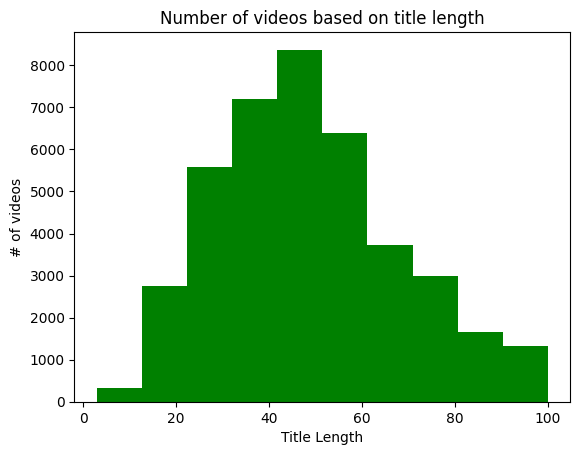

In [275]:
plt.hist(df["Title_length"], bins=10, color='green')
plt.xlabel('Title Length')
plt.ylabel('# of videos')
plt.title('Number of videos based on title length')
plt.show()

Hasil Observasi:
Dari grafik diatas, dapat kita simpulkan bahwa sebagian besar video trending di youtube memiliki panjang title diantara 30-60 huruf

### Berapa banyak video trending di youtube yang memiliki huruf capital semua, huruf capital sebagian, dan huruf kecil semua pada title video? 

In [276]:
df['Title'].count()

40332

In [277]:
def title_capital(x):
    for i in x.split():
        if i.isupper():
            return 'All capital'
        elif i.islower():
            return 'No capital at all'
        else:
            return 'Mixed'


df["Title_capital"] = df["Title"].apply(title_capital)
df["Title_capital"].value_counts(normalize=True)

Mixed                0.792497
All capital          0.196073
No capital at all    0.011430
Name: Title_capital, dtype: float64

(array([0, 1, 2]),
 [Text(0, 0, 'No capital at all'),
  Text(1, 0, 'All capital'),
  Text(2, 0, 'Mixed')])

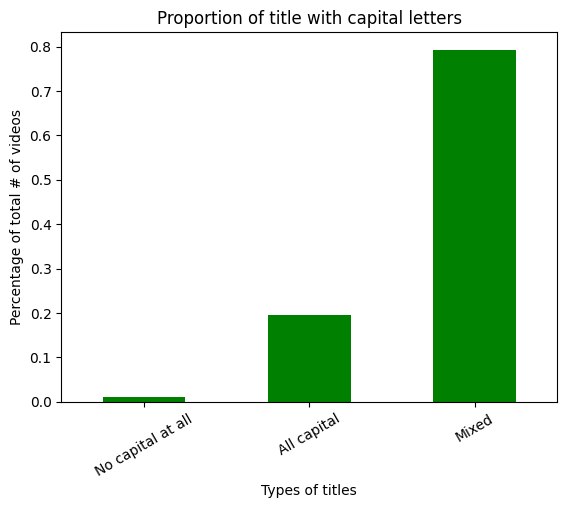

In [278]:
df["Title_capital"].value_counts(normalize=True).sort_values().plot(kind = 'bar', 
                                                                    title = 'Proportion of title with capital letters', 
                                                                    xlabel = 'Types of titles',
                                                                    ylabel = 'Percentage of total # of videos',
                                                                    color = 'green',
                                                                    )
plt.xticks(rotation=30)


Hampir 80% video trending di youtube memiliki judul dengan campuran huruf besar dan kecil. Ini bukan penemuan yang spesial karena pada umumnya saat kita menulis judul, biasanya akan otomatis dimulai dengan huruf kapital, jadi kemungkinan besar mayoritas judul akan memiliki campuran huruf kapital dan huruf kecil 

### Apa saja kata-kata yang paling sering muncul di title video?

Title sebuah video bisa saja mengandung stopwords. Berdasarkan wikipedia, stopwords adalah kata-kata dalam stop list yang disaring sebelum atau sesudah pemrosesan data bahasa alami karena tidak signifikan (beberapa contoh: 'is', 'the', 'at', 'which', 'on', 'he', 'she'). Karena stop words dinilai tidak signifikan terhadap analisis data, maka kita akan menghapus semua kata yang terdapat di dalam title video. Kolom baru 'Title_without_stopwords' adalah kolom yang berisi judul video tanpa stopwords

In [279]:
def remove_stopword(text):
    stop_words = stopwords.words('english')
    #stopwords_dict = Counter(stop_words)
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

df['Title_without_stopwords']=df['Title'].str.lower().apply(lambda x: remove_stopword(x))

df[['Title','Title_without_stopwords']].head()

,Title,Title_without_stopwords
0,WE WANT TO TALK ABOUT OUR MARRIAGE,want talk marriage
1,The Trump Presidency: Last Week Tonight with J...,trump presidency: last week tonight john olive...
2,"Racist Superman | Rudy Mancuso, King Bach & Le...","racist superman | rudy mancuso, king bach & le..."
3,Nickelback Lyrics: Real or Fake?,nickelback lyrics: real fake?
4,I Dare You: GOING BALD!?,dare you: going bald!?


Selanjutnya, kita hanya tertarik pada kata, maka kita tidak akan include angka maupun tanda baca. Kolom baru 'Title_clean' adalah kolom baru yang hanya berisi huruf

In [280]:
df['Title_clean'] = df['Title_without_stopwords'].str.replace('[^a-zA-Z]', ' ')
df[['Title_without_stopwords','Title_clean']].head()

,Title_without_stopwords,Title_clean
0,want talk marriage,want talk marriage
1,trump presidency: last week tonight john olive...,trump presidency last week tonight john olive...
2,"racist superman | rudy mancuso, king bach & le...",racist superman rudy mancuso king bach le...
3,nickelback lyrics: real fake?,nickelback lyrics real fake
4,dare you: going bald!?,dare you going bald


Dari kolom title_clean, kita akan menghapus kata yang hanya berisi 1 huruf, karena kata dengan 1 huruf tidak memiliki arti). Lalu, kita akan tampilkan 20 kata yang paling sering muncul pada title video

In [281]:
title_words = list(df["Title_clean"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]

for i in title_words:
    if len(i)<2:
        title_words.remove(i)

common_words = Counter(title_words).most_common(20)

list1 = []
list2 = []

for i in range (len(common_words)):
    list1.append(common_words[i][0])
    list2.append(common_words[i][1])

common_words_title = pd.DataFrame(list(zip(list1, list2)),
               columns =['Common words', 'Freq'])

common_words_title


,Common words,Freq
0,official,3974
1,video,2826
2,trailer,1998
3,ft,1314
4,vs,1024
5,new,997
6,makeup,876
7,audio,870
8,music,825
9,hd,791


Text(0.5, 1.0, 'Most common words found on youtube trending videos title')

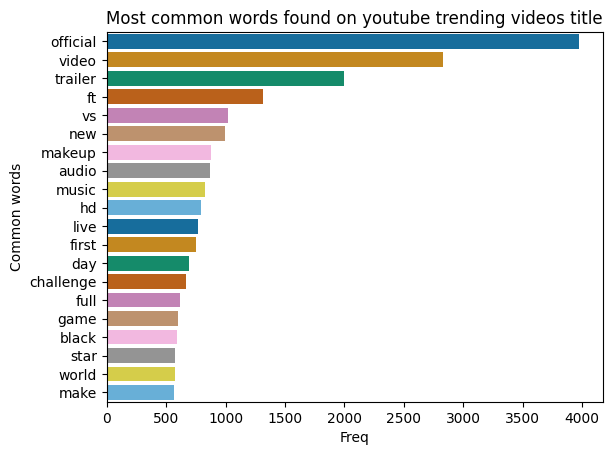

In [282]:
sns.barplot(data=common_words_title, y='Common words', x='Freq', palette='colorblind', orient='h')
plt.title('Most common words found on youtube trending videos title')

### Berdasarkan nama channel: `Channel`

Kita akan menganalisa kolom  `Channel` untuk melihat channel yang paling sering muncul di trending.

Mari kita tampilkan 20 channel dengan jumlah video trending terbanyak

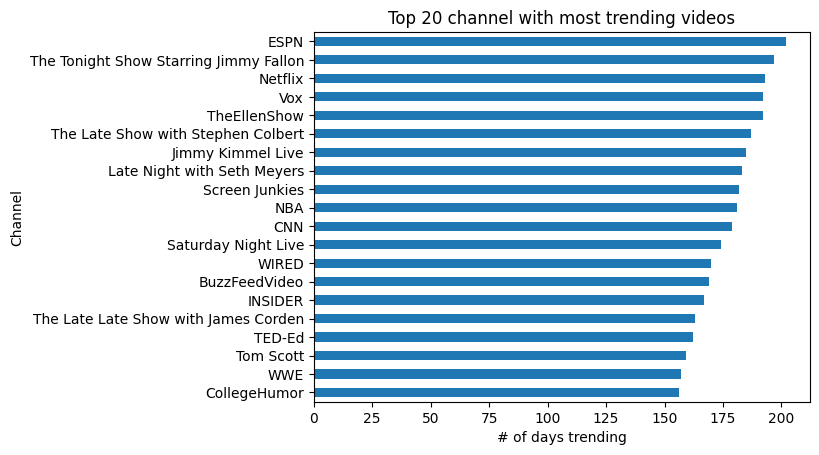

In [283]:
df['Channel'].value_counts().head(20).sort_values().plot(kind='barh')
plt.xlabel('# of days trending')
plt.ylabel('Channel')
plt.title('Top 20 channel with most trending videos')
plt.show()

Hasil observasi: Mayoritas channel yang memiliki jumlah video trending yang banyak merupakan bagian dari sebuah perusahaan / instansi. Misalnya: ESPN dan NBA dari cabang olahraga; CNN, WIRED, INSIDER dari bagian news/journalism, dan lain-lain. 

Satu hal yang menarik adalah 6 dari 20 channel diatas (30%) merupakan Late Night TV shows, yaitu: 
* The Tonight Show Starring Jimmy Fallon
* TheEllenShow
* The Late Show with Stephen Colbert
* Jimmy Kimmel Live
* Late Night with Seth Meyers
* The Late Late Show with James Corden

Umumnya, pada acara TV shows seperti diatas, producer acara mengundang berbagai artis, olahragawan, tokoh-tokoh penting, ataupun seseorang yang sedang viral untuk melakukan wawancara santai. Ini bisa saja adalah salah satu faktor yang membuat video mereka trending 

### Berdasarkan kategori video: `Category`
Kita akan menganalisis kolom  `Category` untuk melihat kategori video apa saja yang sering trending

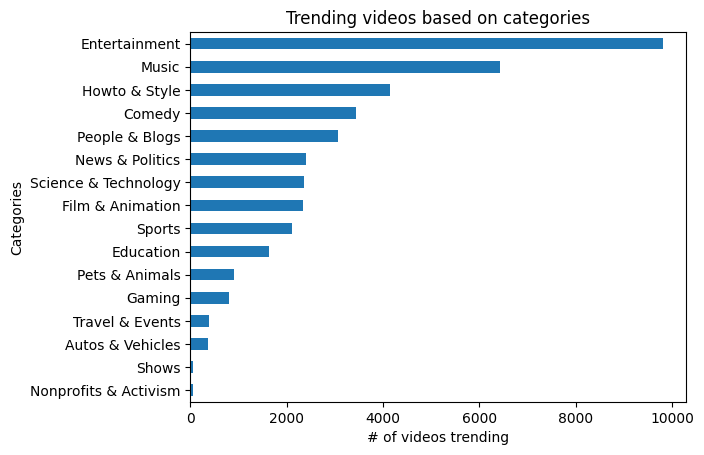

In [284]:
df['Category'].value_counts().sort_values().plot(kind='barh')
plt.xlabel('# of videos trending')
plt.ylabel('Categories')
plt.title('Trending videos based on categories')
plt.show()

Video dengan kategori entertainment merajai klasemen dengan angka mendekati 10,000 videos dari total 40,332 videos (~25%), diikuti oleh kategori musik di peringkat 2 terbanyak dan kategori HowTo & Style di peringkat 3 terbanyak

### Kolom Views, Likes, Dislikes, & Comment counts

### Berdasarkan views, likes, dislikes dan comment counts: `'Views', 'Likes', 'Dislikes', & 'Comment count'`

Kita akan menganalisis kolom `Views', 'Likes', 'Dislikes', & 'Comment count'` untuk menjawab beberapa pertanyaan:

* Apakah distribusi views, likes, dislikes, dan comment counts merupakan distribusi normal?
* Apakah ada korelasi antara views, likes, dislikes, dan comment counts ?
* Apakah video yang trending di youtube mempunyai pattern tertentu pada views, likes, dislikes, dan comment counts?


Mari kita lihat secara lebih detail informasi mengenai kolom-kolom diatas

In [285]:
from scipy.stats import shapiro 

kstat, k_pval = shapiro(df['Views'])
if k_pval<=0.05:
    print('Distribusi Views Tidak Normal')
else:
    print('Distribusi Views Normal')

kstat, k_pval = shapiro(df['Likes'])
if k_pval<=0.05:
    print('Distribusi Likes Tidak Normal')
else:
    print('Distribusi Likes Normal')

kstat, k_pval = shapiro(df['Dislikes'])
if k_pval<=0.05:
    print('Distribusi Dislikes Tidak Normal')
else:
    print('Distribusi Dislikes Normal')

kstat, k_pval = shapiro(df['Comment_count'])
if k_pval<=0.05:
    print('Distribusi Comment_count Tidak Normal')
else:
    print('Distribusi Comment_count Normal')

Distribusi Views Tidak Normal
Distribusi Likes Tidak Normal
Distribusi Dislikes Tidak Normal
Distribusi Comment_count Tidak Normal


In [286]:
df[['Views','Likes','Dislikes','Comment_count']].describe()

,Views,Likes,Dislikes,Comment_count
count,4.033200e+04,4.033200e+04,4.033200e+04,4.033200e+04
mean,2.370824e+06,7.462234e+04,3.508185e+03,8.289092e+03
std,7.432121e+06,2.297311e+05,2.318773e+04,3.433488e+04
min,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.466670e+05,5.615500e+03,2.040000e+02,6.230000e+02
50%,6.884230e+05,1.835150e+04,6.360000e+02,1.873000e+03
75%,1.832174e+06,5.563025e+04,1.945250e+03,5.785000e+03
max,2.252119e+08,5.613827e+06,1.643059e+06,1.228655e+06


Dari tabel diatas, kita mengetahui beberapa informasi penting sebagai berikut:
* Views pada video trending memiliki range 549 - 225 juta, dengan median *688 ribu* views. 
Sekitar 50% data berada di antara 246 ribu views dan 1.8 juta views
* Likes pada video trending memiliki range 0 - 5.6 juta, dengan median *1835* likes 
* Dislikes pada video trending memiliki range 0 - 1.6 juta, dengan median *636* dislikes
* Comment_count pada video trending memiliki range 0 - 1.2 juta, dengan median *1873* comments

Kesimpulan:
* Range dari views sangat besar, sehingga sulit untuk menjustifikasi bahwa views adalah faktor utama yang mempengaruhi video menjadi trending. Namun, persebaran data menunjukkan bahwa 50% videos memiliki views diantara 247 ribu views dan 1.8 juta views (angka yang tidak kecil)
* Tidak semua video trending memiliki likes (minimum di kolom likes = 0) maupun dislikes (minimum di kolom dislikes = 0)
* Tidak semua video trending yang tidak memiliki comment (minimum di kolom comment = 0)

Kita juga ingin melihat korelasi antara views dengan likes, dislikes, dan comment_count

<AxesSubplot: >

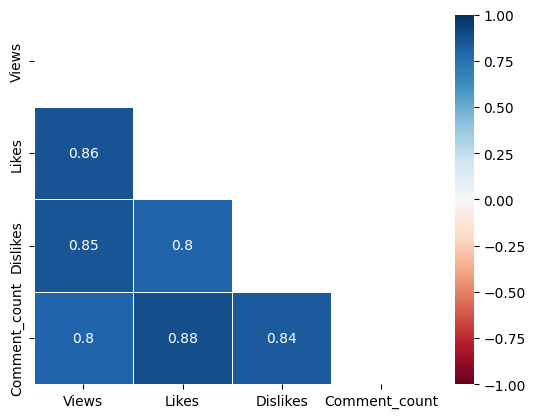

In [287]:
mask = np.triu(np.ones_like(df[['Views','Likes','Dislikes','Comment_count']].corr(method='spearman')))
sns.heatmap(df[['Views','Likes','Dislikes','Comment_count']].corr(method='spearman'), annot=True, vmax=1, vmin=-1, cmap='RdBu', mask=mask,linewidth=0.5)   

Secara garis besar, likes, dislikes dan comment_count memiliki korelasi yang kuat terhadap views, yaitu:
- Korelasi *views* dan *likes* : 0.86
- Korelasi *views* dan *dislikes* : 0.85
- Korelasi *views* dan *comment_count* : 0.8

### Berdasarkan kolom `Comments_Disabled`, `Ratings_Disabled` & `Video_error_or_removed`
Kita akan menganalisis kolom `Comments_Disabled`, `Ratings_Disabled` & `Video_error_or_removed` untuk melihat apakah video yang trending di youtube mempunyai kesamaan di kolom-kolom diatas

In [288]:
df['Comments_disabled'].value_counts()

False    39729
True       603
Name: Comments_disabled, dtype: int64

Text(0.5, 1.0, 'Number of trending videos where comments are disabled')

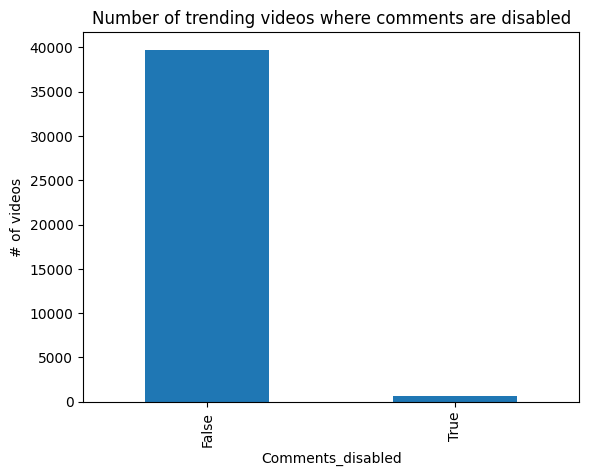

In [289]:
df['Comments_disabled'].value_counts().plot(kind='bar') 
plt.xlabel('Comments_disabled')          
plt.ylabel('# of videos')
plt.title('Number of trending videos where comments are disabled')        

In [290]:
df['Ratings_disabled'].value_counts()

False    40163
True       169
Name: Ratings_disabled, dtype: int64

Text(0.5, 1.0, 'Number of trending videos where ratings are disabled')

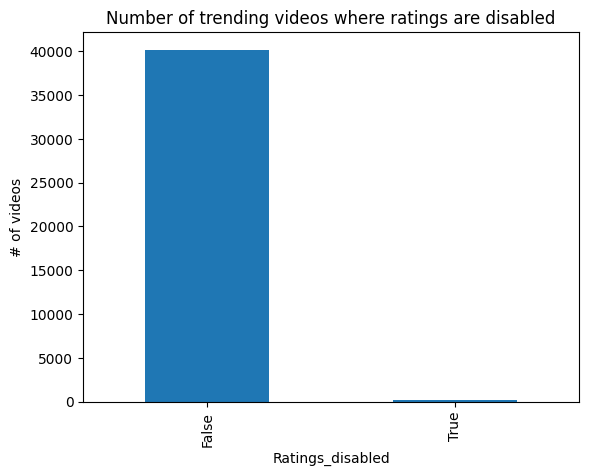

In [291]:
df['Ratings_disabled'].value_counts().plot(kind='bar') 
plt.xlabel('Ratings_disabled')          
plt.ylabel('# of videos')
plt.title('Number of trending videos where ratings are disabled')  

In [292]:
df['Video_error_or_removed'].value_counts()

False    40311
True        21
Name: Video_error_or_removed, dtype: int64

Text(0.5, 1.0, 'Number of trending videos where the video is error or removed')

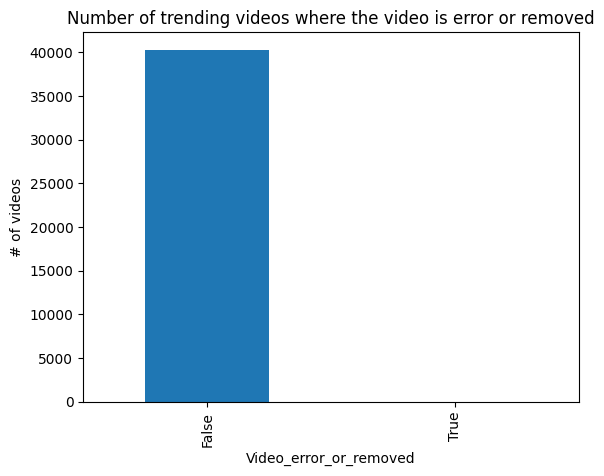

In [293]:
df['Video_error_or_removed'].value_counts().plot(kind='bar') 
plt.xlabel('Video_error_or_removed')          
plt.ylabel('# of videos')
plt.title('Number of trending videos where the video is error or removed')  

Dari output 3 grafik diatas, kita dapat simpulkan bahwa mayoritas (>98%) dari trending videos tidak men-disable bagian comments & ratings. Disamping itu, lebih dari 99% dari video trending tidak pernah mengalami error atau di-remove dari youtube sebelumnya. 

### Berdasarkan publish date video: `Publish_day` & `Publish_hour`
Kita akan menganalisis kolom `Publish_day` & `Publish_hour` untuk mencari tau kapan waktu yang paling optimal untuk publish video ke youtube

In [294]:
df['Publish_day'].value_counts()

Thursday     6873
Friday       6831
Wednesday    6687
Tuesday      6686
Monday       6072
Sunday       3623
Saturday     3560
Name: Publish_day, dtype: int64

Text(0.5, 1.0, '# of trending videos published based on day of the week')

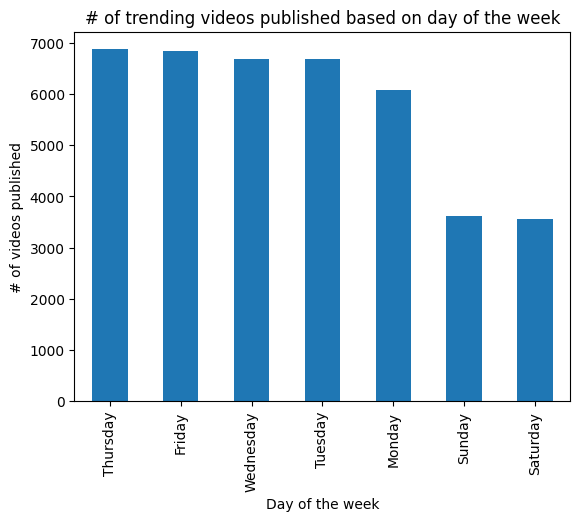

In [295]:
df['Publish_day'].value_counts().plot(kind='bar')
plt.xlabel('Day of the week')
plt.ylabel('# of videos published')
plt.title('# of trending videos published based on day of the week')

Text(0.5, 1.0, 'Publishing hour and # of videos ')

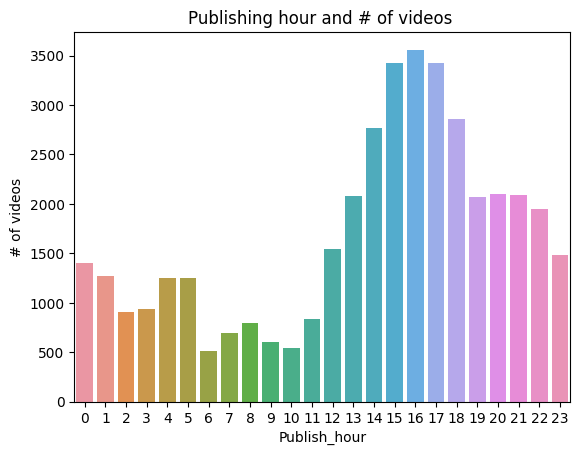

In [296]:
sns.countplot(x=df["Publish_hour"])
plt.ylabel('# of videos')
plt.title('Publishing hour and # of videos ')

### Berdasarkan tags video: `Tags`
Kita akan menganalisis kolom  `Tags` untuk melihat jumlah tags pada setiap video

In [297]:
df['Count_Tags'] = df['Tags'].str.split('|')
df['Count_Tags'] = df['Count_Tags'].str.len()
df[['Tags','Count_Tags']].head()

,Tags,Count_Tags
0,SHANtell martin,1
1,"last week tonight trump presidency|""last week ...",4
2,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",23
3,"rhett and link|""gmm""|""good mythical morning""|""...",27
4,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",14


In [298]:
df['Count_Tags'].value_counts()

1     1632
10    1427
7     1365
4     1364
13    1289
      ... 
63      16
61       9
59       5
65       2
60       1
Name: Count_Tags, Length: 65, dtype: int64

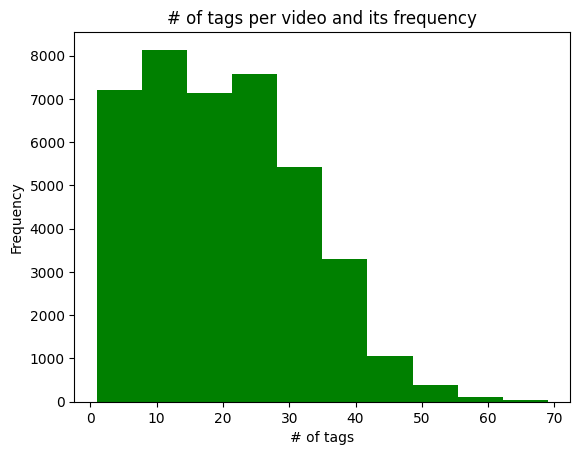

In [299]:
plt.hist(df["Count_Tags"], bins=10, color='green')
plt.xlabel('# of tags')
plt.ylabel('Frequency')
plt.title('# of tags per video and its frequency')
plt.show()

Bisa dilihat dari grafik diatas bahwa mayoritas videos memiliki tags yg tidak terlalu banyak (Jumlah tags dengan videos terbanyak adalah sekitar 8-15 tags)

In [300]:
def remove_stopword(text):
    stop_words = stopwords.words('english')
    #stopwords_dict = Counter(stop_words)
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

df['Tags_without_stopwords']=df['Tags'].str.lower().apply(lambda x: remove_stopword(x))

df[['Tags','Tags_without_stopwords']].head()

,Tags,Tags_without_stopwords
0,SHANtell martin,shantell martin
1,"last week tonight trump presidency|""last week ...","last week tonight trump presidency|""last week ..."
2,"racist superman|""rudy""|""mancuso""|""king""|""bach""...","racist superman|""rudy""|""mancuso""|""king""|""bach""..."
3,"rhett and link|""gmm""|""good mythical morning""|""...","rhett link|""gmm""|""good mythical morning""|""rhet..."
4,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...","ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""..."


In [301]:
df['Tags_clean'] = df['Tags_without_stopwords'].str.replace('[^a-zA-Z]', ' ')
df[['Tags_without_stopwords','Tags_clean']].head()

,Tags_without_stopwords,Tags_clean
0,shantell martin,shantell martin
1,"last week tonight trump presidency|""last week ...",last week tonight trump presidency last week ...
2,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",racist superman rudy mancuso king bach ...
3,"rhett link|""gmm""|""good mythical morning""|""rhet...",rhett link gmm good mythical morning rhet...
4,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",ryan higa higatv nigahiga i dare you ...


In [302]:
tags_words = list(df["Tags_clean"].apply(lambda x: x.split()))
tags_words = [x for y in tags_words for x in y]

for i in tags_words:
    if len(i)<2:
        tags_words.remove(i)

common_tags = Counter(tags_words).most_common(20)

list1 = []
list2 = []

for i in range (len(common_tags)):
    list1.append(common_tags[i][0])
    list2.append(common_tags[i][1])

common_words_tags = pd.DataFrame(list(zip(list1, list2)),
               columns =['Common tags', 'Freq'])

common_words_tags

,Common tags,Freq
0,the,10026
1,video,8289
2,makeup,7948
3,funny,7303
4,new,7082
5,how,6927
6,music,6539
7,show,5994
8,news,5878
9,food,4812


Text(0.5, 1.0, 'Most common tags found on youtube trending videos title')

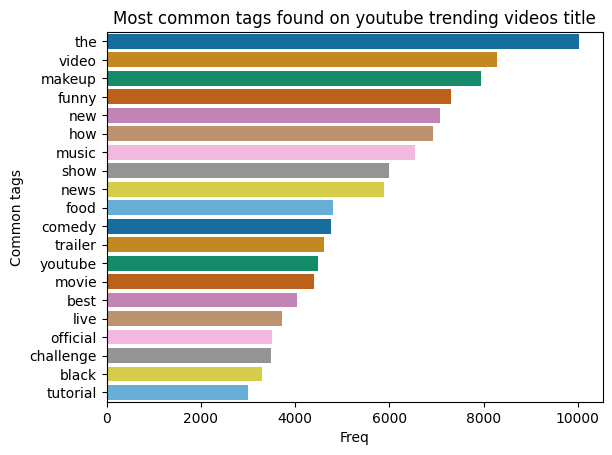

In [303]:
sns.barplot(data=common_words_tags, y='Common tags', x='Freq', palette='colorblind', orient='h')
plt.title('Most common tags found on youtube trending videos title')

Bar plot diatas menunjukkan 20 kata yang paling sering muncul pada video trending di youtube. Dengan observasi yang lebih dekat, banyak kata-kata yang muncul pada tags juga muncul pada judul video (seperti: 'video', 'official', 'trailer', 'challenge' dan banyak lagi. Ini adalah hal yang masuk akal karena tags digunakan untuk memudahkan viewers untuk mencari video berdasarkan keyword tertentu. 

### Berdasarkan description video: `Description`
Kita akan menganalisis kolom  `Description` untuk melihat jumlah huruf pada kolom description pada setiap video

In [304]:
df['Description_length'] = df['Description'].str.len()
df[['Description','Description_length']].head()


,Description,Description_length
0,SHANTELL'S CHANNEL - https://www.youtube.com/s...,1410
1,"One year after the presidential election, John...",630
2,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,1177
3,Today we find out if Link is a Nickelback amat...,1403
4,I know it's been a while since we did this sho...,636


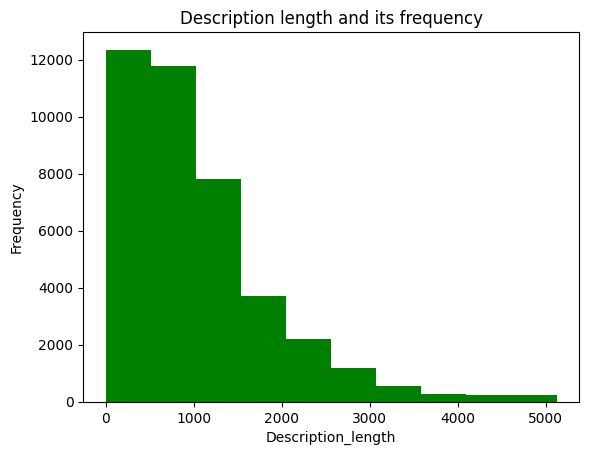

In [305]:
plt.hist(df["Description_length"], bins=10, color='green')
plt.xlabel('Description_length')
plt.ylabel('Frequency')
plt.title('Description length and its frequency')
plt.show()

Observasi: Mayoritas video trending di youtube memiliki panjang description dibawah 1000 huruf. 

Simpan file dalam excel yang akan digunakan untuk visualisasi di tableau

In [306]:
df.to_excel('capstone2.xlsx')

# Kesimpulan dan Rekomendasi 

Dari analisis yang telah dilakukan, kita bisa membuat kesimpulan berikut tentang karakteristik video youtube yang trending:
* Sebagian besar dari video trending youtube memiliki judul video dengan panjang diantara 30-60 huruf.
* 79% video trending memiliki judul dengan campuran huruf kapital dan huruf kecil. 
* Kata-kata yang sering muncul pada judul video adalah 'official', 'video', 'trailer' dan juga kata-kata yang bersifat kolaboratif seperti: 'ft', 'vs', 'challenge'
* Mayoritas channel yang memiliki jumlah video trending yang banyak merupakan bagian dari sebuah perusahaan / instansi. Misalnya: ESPN dan NBA dari cabang olahraga; CNN, WIRED, INSIDER dari bagian news/journalism, dan lain-lain. Satu hal yang menarik adalah 6 dari 20 channel diatas (30%) merupakan Late Night TV shows
* Top 3 kategori video trending youtube: Entertainment, Music, dan HowTo&style
* Persebaran views pada video trending tidak normal, dimana views video trending memiliki median 688 ribu views. 
* Mayoritas video trending youtube memiliki karakteristik: tidak menutup kolom komentar, tidak menutup kolom ratings, dan tidak pernah error/removed
* Top 3 Publish day: Thursday, Friday, Wednesday
* Bottom 2 Publish day: Saturday and Sunday (weekends)
* Jam terbaik untuk publish video youtube adalah diantara jam 3-5 sore
* Banyak kata-kata yang muncul pada tags juga muncul pada judul video (seperti: 'video', 'official', 'trailer', 'challenge' dan banyak lagi. Ini adalah hal yang masuk akal karena tags digunakan untuk memudahkan viewers untuk mencari video berdasarkan keyword tertentu. 
* Mayoritas video trending di youtube memiliki panjang description dibawah 1000 huruf. 


Rekomendasi:
* Judul video sebisa mungkin berkisar antara 30-50 huruf 
* Tema video yang dibuat jika bisa dibuat mengikuti 3 kategori paling sering trending, yaitu kategori "Entertainment", "Music", atau "HowTo&Style"
* Cari ide-ide video yang memiliki unsur kolaboratif, seperti "challenge dalam sebuah game bersama bintang tamu" atau "duet nyanyi",
* Upload video di hari rabu, kamis, atau jumat 
* Upload video di antara jam 3-5 sore
* Jangan disable kolom comment maupun rating
* Lebih teliti dalam meng-upload video sehingga tidak terjadi error atau di remove
* Mayoritas video trending memiliki kurang dari 30 tags